## Introdução

Este projeto é o desafio técnico do processo seletivo da Indicium para o programa LightHouse, na trilha de Ciência de Dados.

Para esse notebook, será desenvolvido uma análise exploratória do dataset `desafio_indicium_imdb` para entender sobre a estrutura dos dados, analisar cada features, responder algumas perguntas, preparar os dados e criar um modelo de regressão com `sckit-learn`.

**Informações do Dataset:**
- `Series_Title`: Nome do filme
- `Released_Year`: Ano de lançamento
- `Certificate`: Classificação etária
- `Runtime`: Tempo de duração
- `Genre`: Gênero
- `IMDB_Rating`: Nota do IMDB
- `Overview`: Overview do filme
- `Meta_score`: Média ponderada de todas as críticas 
- `Director`: Diretor
- `Star1`: Ator/atriz #1
- `Star2`: Ator/atriz #2
- `Star3`: Ator/atriz #3
- `Star4`: Ator/atriz #4
- `No_of_Votes`: Número de votos
- `Gross`: Faturamento

### Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando bibliotecas para NLP
from collections import Counter
import spacy
import re

# Ignorando avisos do sistema
import warnings
warnings.filterwarnings('ignore')

# Definindo uma paleta do cores para todo projeto
cores = "flare"

### Carregando os dados e inspeção inicial

In [2]:
df = pd.read_csv("../data/desafio_indicium_imdb.csv")

In [3]:
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

Quantidade de linhas: 999
Quantidade de colunas: 16


In [4]:
# Visão geral do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Existem algumas features inconsistentens nos dados, como uma coluna sem nome; valores `non-null` abaixo da quantidade de linhas (indicando valores ausentes) nas colunas `Certificate`, `Meta_score`, `Gross`; algumas colunas com Dtype no formato `object` que possívelmente deveria estar como `int` ou `float`.

In [5]:
# Primeiras linhas do Dataframe
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### Limpeza dos Dados

Nesta etapa, será removida a coluna "Unnamed" pois se trata apenas de um índice que foi carregado junto aos dados. Em seguida, vamos lidar com duplicatas se necessário e com os valores ausentes.

In [6]:
# Removendo colunas desnecessárias
df.drop(columns="Unnamed: 0", inplace=True)

In [7]:
print("Contagem de filmes com o mesmo nome:")
df['Series_Title'].value_counts().head()

Contagem de filmes com o mesmo nome:


Series_Title
Drishyam            2
Falling Down        1
Cidade de Deus      1
The Muppet Movie    1
The Warriors        1
Name: count, dtype: int64

Existe apenas um filme com duplicata, o que não irá prejudicar as análises. Um outro ponto importante a se fazer inicialmente, será converter as seguintes colunas para `int`:

- Released_Year

- Runtime (remover ' min')

- Gross (remover vírgulas)

Para isso, será necessário a utilização de técnicas específicas durante a conversão de cada uma dessas colunas.

In [8]:
# Removendo strings
df['Runtime'] = df['Runtime'].str.replace(' min', '')
df['Gross'] = df['Gross'].str.replace(',', '')

# Colunas alvo
conversao_int = ["Released_Year", "Runtime", "Gross"]

# Convertendo para int64
df[conversao_int] = df[conversao_int].apply(pd.to_numeric, downcast='integer', errors='coerce').astype('Int64')

In [9]:
print("Tipos de dados após conversão:")
df.dtypes

Tipos de dados após conversão:


Series_Title      object
Released_Year      Int64
Certificate       object
Runtime            Int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross              Int64
dtype: object

In [10]:
print("Contagem de valores nulos por coluna:")
df.isnull().sum()

Contagem de valores nulos por coluna:


Series_Title       0
Released_Year      1
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

As colunas `Released_Year`, `Certificate`, `Meta_score` e `Gross` possuem valores ausentes que precisam de atenção. Mas primeiro, é necessário observar esses dados de perto. Para isso, será usada uma máscara lógica para observar as amostras e decidir a melhor maneira de lidar com esses valores.

In [11]:
# Criando uma máscara lógica com NaNs   
colunas_null = ["Released_Year", "Certificate", "Meta_score", "Gross"]
null_mask = df[colunas_null].isnull()
null_mask[0:5]

,Released_Year,Certificate,Meta_score,Gross
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [12]:
# Filtragem com cinco amostras
linhas_com_null = null_mask.any(axis=1)
df[linhas_com_null].head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
17,Hamilton,2020,PG-13,160,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,<NA>
19,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,<NA>
29,Seppuku,1962,NaN,133,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,<NA>
31,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,<NA>
45,Hotaru no haka,1988,U,89,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,<NA>


Os valores ausentes irão impactar negativamente o desempenho das analises, principalmente a quantidade de NaNs em `Meta_score` e `Gross`. A melhor decisão, será remover esses valores.

In [13]:
df.dropna(inplace=True)

In [14]:
print(f"Quantidade de linhas após remoção de NaNs: {df.shape[0]}\nValores nulos restantes:")
df.isna().sum()

Quantidade de linhas após remoção de NaNs: 712
Valores nulos restantes:


Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

## Análise Exploratória de Dados - EDA

In [15]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,712.0,712.0,712.000000,712.000000,7.120000e+02,712.0
mean,1995.738764,123.667135,7.935674,77.154494,3.534662e+05,78450169.183989
std,18.611182,25.907607,0.288928,12.418115,3.464502e+05,115068637.166882
min,1930.0,72.0,7.600000,28.000000,2.522900e+04,1305.0
25%,1986.75,104.0,7.700000,69.750000,9.566475e+04,6143199.0
50%,2001.0,120.0,7.900000,78.000000,2.359815e+05,34850145.5
75%,2010.0,136.0,8.100000,86.000000,5.065428e+05,102360615.0
max,2019.0,238.0,9.200000,100.000000,2.303232e+06,936662225.0


A partir do resumo estatístico da função `describe()` já é possível notar muitos insights interessantes:

- Os filmes estão entre os anos de 1930 à 2019

- Em média, os filmes possuem 2 horas de duração (123 minutos)

- Não temos filmes com uma nota máxima no IMDB, mas temos uma nota bem alta com 9,2

- Filme(s) com um meta score que atingiu 100 pontos

- Título(s) que obteve um faturamento discrepante, com aproximadamente 940 milhões (a notação cientifica e+08, indica que o número à esquerda do ponto contém oito zeros)

A análise exploratória será desenvolvida em subtópicos para responder algumas perguntas e para manter uma organização.

### Recomendação de filme

In [16]:
# Recomendando um filme a partir das features numéricas
col_recomend = ["Series_Title", "Released_Year", "Runtime", "IMDB_Rating", "Meta_score", "No_of_Votes", "Gross"]

df_recomend = df[col_recomend].copy()
df_recomend.sort_values(by=["IMDB_Rating", "No_of_Votes"], ascending=False, inplace=True, ignore_index=True)
df_recomend.head()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Godfather,1972,175,9.2,100.0,1620367,134966411
1,The Dark Knight,2008,152,9.0,84.0,2303232,534858444
2,The Godfather: Part II,1974,202,9.0,90.0,1129952,57300000
3,12 Angry Men,1957,96,9.0,96.0,689845,4360000
4,Pulp Fiction,1994,154,8.9,94.0,1826188,107928762


O filme que seria uma recomendação para uma pessoa, seria o filme **The Dark Knight**. A escolha foi pensada em relação à nota alta do IMDB, o número de votos e o ano de lançamento. O faturamente foi alto, mas isso é influenciado por diversos fatores que vai além dos nossos dados, como a popularidade do "super-herói". Mesmo o filme **The Godfather** estando em primeiro com uma nota excelente e muito bem votado, esse filme foi estreado em 1972 e isso possivelmente não agradaria a maioria das pessoas. Por esse motivo, confirmo a indicação para o filme **The Dark Knight**.

### Análise dos Gêneros

Abaixo, vamos analizar a destribuição de gêneros que temos para descobrir quais são os mais frequentes. Para isso, será necessário dividir os campos separados por virgula e fazer uma contagem unificada, que será observada em um gráfico de barras.

In [17]:
# Preparando os dados para plotagens futuras com os gêneros
df_exploded = df.copy()

df_exploded['Genre'] = df_exploded['Genre'].str.split(', ?')
df_exploded = df_exploded.explode('Genre')
df_exploded['Genre'] = df_exploded['Genre'].str.strip()

# Dados para o top10 de generos
df_genre_counts = df_exploded['Genre'].value_counts().reset_index()
df_genre_counts.columns = ['Genre', 'Count']

# Definindo x, y do plot
generos = df_genre_counts['Genre'].head(10)
contagem = df_genre_counts['Count'].head(10)

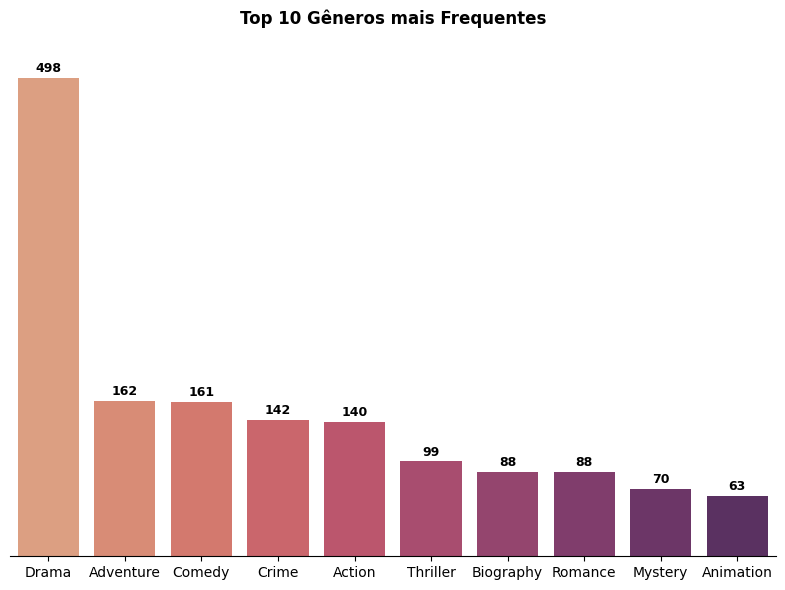

In [18]:
# Gráfico de Barras
plt.figure(figsize=(8,6))
ax = sns.barplot(x=generos, 
                 y=contagem, 
                 palette=cores)

for i in range(len(generos)):
    ax.annotate(f"{contagem[i]:.0f}",
                (i, contagem[i]),
                ha="center",
                xytext=(0, 4),
                textcoords="offset points",
                fontsize=9,
                fontweight="bold")

ax.set_title("Top 10 Gêneros mais Frequentes\n", fontsize=12, fontweight="bold")
ax.set_xlabel("")
ax.set_ylabel("Quantidade de Filmes")

ax.yaxis.set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()

Podemos observar que o gênero **Drama** é disparado o mais frequente de filmes disponíveis no dataset, seguindo em segunda posição o gênero de **Adventure** com uma **diferença de 207%**. 

Geralmente, os filmes dramáticos costumam ter uma duração mais longa para um melhor aprofundamento dos personagens com uma narrativa mais complexa... mas isso seria mesmo verdade? Para isso, faremos uma análise direcionada aos três primeiros gêneros do top 10.

In [19]:
# Preparando os dados
gen_select = ['Drama', 'Adventure', 'Comedy']
df_boxplot = df_exploded[df_exploded['Genre'].isin(gen_select)]

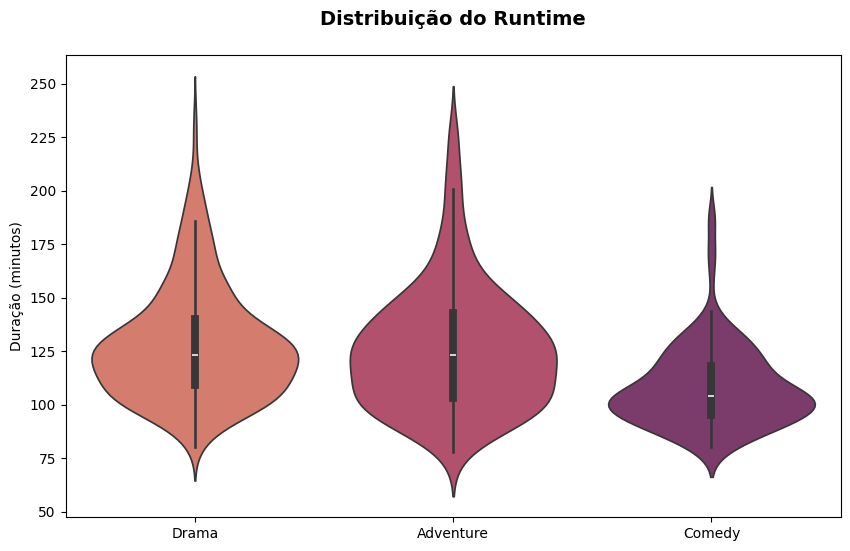

In [20]:
# Plot com
plt.figure(figsize=(10,6))
sns.violinplot(data=df_boxplot,
               x='Genre',
               y='Runtime',
               palette=cores)

plt.title("Distribuição do Runtime\n",fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Duração (minutos)")
plt.show()

Analisando o gráfico Violin Plot, podemos observar o "corpo do violino" dos três gêneros. O formato mais largo, indica onde existe uma alta concentração de densidade dos dados.

- **Drama:** A parte mais largas do violino indica uma que os filmes dramáticos possuem em média uma duração de aproximadamente 125 minutos, levando em conta a barra preta no meio, indicando o intervalo interqualtil dos dados (variando de 110 à 140 minutos, aproximadamente). 

- **Adventure:** Possui uma distribuição menos acentuada, com uma duração próxima aos filmes dramáticos com uma tendência à serem mais curtos em sua maior distribuição.

- **Comedy:** Por outro lado, os filmes de comédia possui uma distribuição bastante acentuada, com uma duração de 100 minutos dos filmes.

Podemos concluir que, levando em conta aos filmes do top 10, os dois primeiros da colocação possuem uma duração proxima. Sendo assim, os filmes dramáticos podem ser mais longos que os filmes de aventura e comédia ao observar as distribuições de densidade, mas isso não é generalizável, pois muitos filmes de aventura ainda conseguem ser tão longos quanto.

### Correlação do Faturamento

In [21]:
df_corr = df_recomend.drop(columns='Series_Title')
df_corr.corr()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,-0.017884,-0.178896,-0.272659,0.200074,0.234654
Runtime,-0.017884,1.000000,0.258985,-0.005938,0.213211,0.168775
IMDB_Rating,-0.178896,0.258985,1.000000,0.283994,0.609444,0.132396
Meta_score,-0.272659,-0.005938,0.283994,1.000000,0.028575,-0.014656
No_of_Votes,0.200074,0.213211,0.609444,0.028575,1.000000,0.561532
Gross,0.234654,0.168775,0.132396,-0.014656,0.561532,1.000000


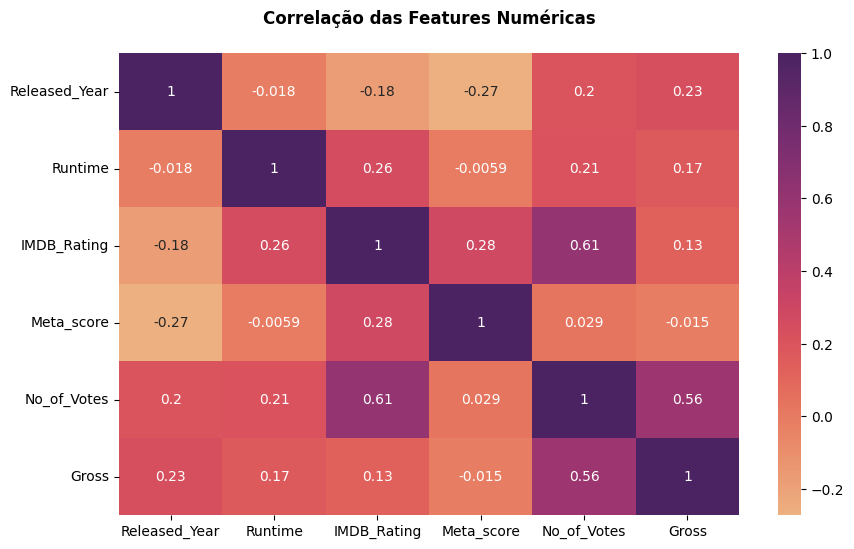

In [22]:
# Representação gráfica
plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(),
            annot=True,
            cmap=cores)

plt.title("Correlação das Features Numéricas\n", fontweight='bold')
plt.show()

Analisando o gráfico de calor, podemos ver que existe uma correlação positiva do faturamento `Gross` com o número de votos `No_of_Votes` com `0.56`, o que reforça que quanto mais o público gosta do filme (votos), mais o filme tende a ser lucrativo. Mas isso é apenas uma análise superficial, pois podem existir mais features que influenciam nesse retorno financeiro.

Deste modo, vamos observar como o faturamente se sai se levarmos em conta outras features, mas dessa vez não numéricas.

In [23]:
col_stars = ["Series_Title", "Director", "Star1", "Star2", "No_of_Votes", "Gross"]
df_stars = df[col_stars].copy()

df_stars.sort_values(by=["No_of_Votes", "Gross"], ascending=False, inplace=True, ignore_index=True)
df_stars.head(10)

,Series_Title,Director,Star1,Star2,No_of_Votes,Gross
0,The Dark Knight,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444
1,Inception,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,2067042,292576195
2,Fight Club,David Fincher,Brad Pitt,Edward Norton,1854740,37030102
3,Pulp Fiction,Quentin Tarantino,John Travolta,Uma Thurman,1826188,107928762
4,Forrest Gump,Robert Zemeckis,Tom Hanks,Robin Wright,1809221,330252182
5,The Matrix,Lana Wachowski,Lilly Wachowski,Keanu Reeves,1676426,171479930
6,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,Elijah Wood,Ian McKellen,1661481,315544750
7,The Lord of the Rings: The Return of the King,Peter Jackson,Elijah Wood,Viggo Mortensen,1642758,377845905
8,The Godfather,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411
9,The Dark Knight Rises,Christopher Nolan,Christian Bale,Tom Hardy,1516346,448139099


Levando em conta que quanto mais o público vota em um filme mais ele tende a lucrar, foi passado o `No_of_Votes` como argumento primário durante o `sort.values()`.

Com isso, é possível confirmar que nomes conhecidos, tanto dos diretores quanto das estrelas em `Star1` influenciam fortemente para uma boa margem de lucro de um filme, principalmente do **Christopher Nolan**.

### Insights em Overview

In [24]:
df.loc[0,'Overview']

"An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son."

A coluna "Overview" se trata de uma sinopse para os filmes. Por estar em textos extensos, será necessário aplicar técnicas de Processamento de Linguagem Natural para uma extração mais acertiva de informações e de insights.

Deste modo, será criado uma função para pré-processar o texto e separá-los em tokens a partir de um doc do `spacy`.

In [ ]:
# modelo leve do spaCy
nlp = spacy.load("en_core_web_sm")

def text_preprocessing(text):
    """
    Preprocessa um texto reduzindo letras à minúsculas,
    remove números, símbolos e pontuações, 
    normaliza espaços em branco,
    remove stop words e lematiza as palavras.
    Respectivamente.

    Args:
        text (str): O texto a ser pre-processado.

    Returns:
        list: Lista de tokens. Em caso de erro, retorna uma lista vazia.
    """
    try:
        text = text.lower() 
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        text = re.sub(r'\s+', ' ', text)

        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

        return tokens
       
    except Exception as e:
        print(f"Erro no pre-processamento: {e}")
        return []

In [30]:
# Aplicando a função em uma cópia dos dados
df_pln = df[["Overview", "Genre"]].copy()
df_pln["Overview"] = df_pln["Overview"].apply(text_preprocessing)

print(f"Texto original: {df.loc[0,'Overview']}")
print(f"Texto Pre-Processado e em Tokens: {df_pln.loc[0,'Overview']}")

Texto original: An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.
Texto Pre-Processado e em Tokens: ['organized', 'crime', 'dynasty', 'age', 'patriarch', 'transfer', 'control', 'clandestine', 'empire', 'reluctant', 'son']


O texo original teve as palavras isoladas (tokens) em uma lista. Foram removidos artigos, preposições, conectivos e varias outras palavras que são redundantes para esse tipo de tarefa. Alguma palavras também foram lematizadas, ou seja, voltaram as suas origens (como "aging" para "age" ou "transfers" para "transfer"). Isso ajuda a normalizar as palavras unificando as que possuem o mesmo valor semântico.

Feito isso, agora podemos iniciar uma contagem das palavras mais frequentes de todo o texto e também de alguns gêneros que serão selecionados.

In [31]:
df_tokens = df_pln.explode("Overview")

# Iniciando contagem
contagem_geral = Counter(df_tokens["Overview"])
print("Palavras mais comuns no dataset inteiro:")
print(contagem_geral.most_common(5))

Palavras mais comuns no dataset inteiro:
[('life', 96), ('young', 91), ('man', 76), ('find', 76), ('world', 65)]


In [38]:
generos_alvo = ["Adventure", "Crime", "Romance"]
contagem_genero = {}

df_tokens["Genre"] = df_tokens["Genre"].astype(str).fillna("")

for gen in generos_alvo:
    tokens_g = df_tokens[df_tokens["Genre"].str.contains(gen, case=False)]["Overview"]
    contagem_genero[gen] = Counter(tokens_g).most_common(5)

for gen, contagem in contagem_genero.items():
    df = pd.DataFrame(contagem, columns=['Token', 'Frequência'])
    print(f"\nPalavras mais comuns em {gen}:")
    print(df.to_string(index=False))


Palavras mais comuns em Adventure:
 Token  Frequência
 world          26
 young          23
  find          18
friend          15
   new          14

Palavras mais comuns em Crime:
 Token  Frequência
murder          19
  find          16
  life          15
   man          15
police          15

Palavras mais comuns em Romance:
Token  Frequência
woman          17
 love          16
 life          16
  man          15
young          15


Ao observar cada um dos três gêneros selecionados, podemos tirar conclusões intuitivas a partir do `Overview` e deduzir qual é o seu gênero a apartir das contagens de palavras:

- **Adventure:** Palavras como: world, find, new, friend. traz uma ideia de coisas novas, encontrar coisas em um mundo ou até mesmo fazer amizades.

- **Crime:** Murder, find, police, traz uma ideia de filmes investigativos, com muito mistério envolvido.

- **Romance:** Woman, love, man, traz uma ideia de filmes amorosos e romanticos.

Por fim, é possível deduzir de maneira simples os gêneros dos filmes a partir do `Overview` com contagens de tokens usando um modelo leve do spacy. Para uma confirmação mais precisa, seria necessário utilizar técnicas mais avançadas, ou até mesmo modelos mais robustos como o BERT.

## Previsão de notas IMDB